# APS 5 - Questões com auxílio do Pandas

** Emanuelle Moço: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [120]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import expon
import scipy.stats as stats

In [121]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [122]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [123]:
#criar uma nova coluna "hemisfério"
df.loc[(df.Latitude>0), 'Hemisfério'] = 'Norte'
df.loc[(df.Latitude<0), 'Hemisfério'] = 'Sul'


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

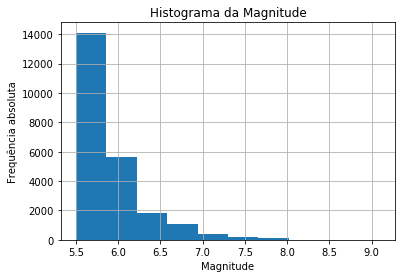

In [124]:
plot = df.Magnitude.plot.hist(title='Histograma da Magnitude')
plt.ylabel('Frequência absoluta')
plt.xlabel('Magnitude')
plt.grid(True)

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [125]:
#mu = média
#sigma = desvio padrão
mu, sigma = stats.expon.fit(df['Magnitude'])
print (mu, sigma)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

(array([  1.67376179e+00,   6.71189513e-01,   2.14752169e-01,
          1.30512368e-01,   4.66285096e-02,   2.53905879e-02,
          1.23393511e-02,   2.25430454e-03,   5.93238036e-04,
          3.55942821e-04]),
 array([ 5.5 ,  5.86,  6.22,  6.58,  6.94,  7.3 ,  7.66,  8.02,  8.38,
         8.74,  9.1 ]),
 <a list of 10 Patch objects>)

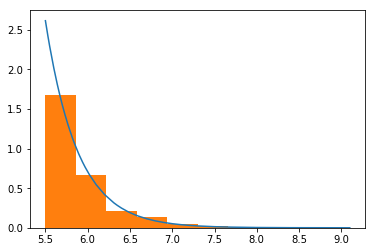

In [126]:
#fazer a relação entre loc e scale com mu e sigma
#relação entre médiae desvio padrao
loc = mu
scale = sigma


plt.plot(sorted(df["Magnitude"]),stats.expon.pdf(sorted(df['Magnitude']), loc, scale))
plt.hist(df.Magnitude, normed=True)


## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [127]:
ct_hemisferio = pd.crosstab(df.Hemisfério, df.Type, normalize=True)

ct_hemisferio

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447140,0.000085,0.006279,0.000000
Sul,0.545171,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [142]:
#
prob_norte_terremoto = ((df.Hemisfério=='Norte') & (df.Type=='Earthquake')).value_counts()
prob_terremoto = (df.Type=='Earthquake').value_counts()


prob_terremono_norte = (prob_norte_terremoto[1]/prob_terremoto[1])
prob_terremono_norte 



0.45058539944903581

Explique o seu raciocínio

Eu assumi que o exercício pede a probabilidade de, dado um terremoto ocorreu, ele ter ocorrido no norte. Portando, usei a fórmula abaixo:

P(N/Terremoto) = P(terremoto n norte) / p(terremoto)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [146]:
prob_norte_ne = ((df.Hemisfério=='Norte') & (df.Type=='Nuclear Explosion')).value_counts()
prob_ne = (df.Hemisfério=='Norte').value_counts()


prob_ne_norte = (prob_norte_nuclear_exp[1]/prob_nuclear_exp[1])

prob_ne_norte


0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ... 0.013845719129697655

P(Nuclear Explosion/N) = P (N n Nuclear Explosion ) / P(Nuclear Explosion)

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

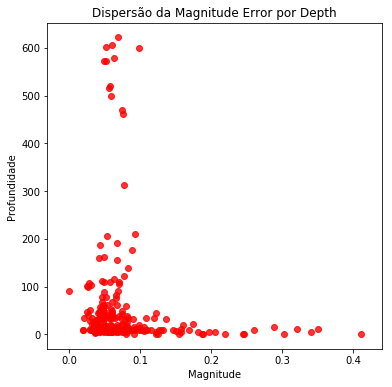

In [130]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df["Magnitude Error"], df.Depth, c='red', alpha=0.8)
plt.title('Dispersão da Magnitude Error por Depth')
plt.xlabel('Magnitude')
plt.ylabel('Profundidade')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [139]:
#print("Correlação entre Magnitude Error e Depth:",np.corrcoef(df["Magnitude Error"],df.Depth)[0,1])  


print("Correlação entre Magnitude Error e Depth:",df["Magnitude Error"].corr(df.Depth))  



Correlação entre Magnitude Error e Depth: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

###### O valor da correlação mostra que elas são inversas (pois é negativo) e a variação é muito pequena, isso pode ser percebido devido a proximidade entre os pontos.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [183]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [184]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

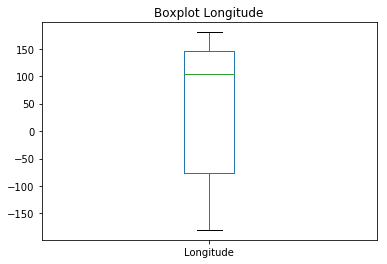

In [135]:
# Boxplot Longitude
plot = df.Longitude.plot(kind='box',title='Boxplot Longitude')#, color='red')

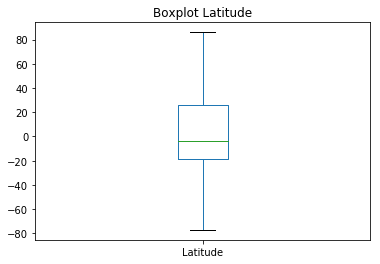

In [136]:
# Boxplot Latitude
plot = df.Latitude.plot(kind='box',title='Boxplot Latitude')#, color='red')

### Podemos perceber que a maior concentração de latitude varia de 0 até -20
### e que a maior concentração de longitude varia de 100 até 150
### Pportando, há uma maior probabilidade ocorrência de derremoto é no Leste e no Sul

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [185]:
#tabela com só magnitude MB e type NE
novo = df[(df['Magnitude Type'] == 'MB') & (df.Type == 'Nuclear Explosion')]

novo.Hemisfério.value_counts(True)


Norte    0.828221
Sul      0.171779
Name: Hemisfério, dtype: float64

## Analisando os resultados obtidos acima, vemos que é mais provável que esses dois eventos aconteçam juntos no norte (82%)